# Decision Tree Regression

Decision Tree dibagi 2, ada yang classification dan ada yang regression

Decision Tree Regression, mudahnya hanya membagi independent variables ke kelompok tertentu.
Berikut prosedur untuk membagi kelompok data sekaligus membuat model dalam decision Tree Regression : 
1. Tentukan apakah data independent variables bisa dibagi menjadi lebih kelompok. disini adalah tugas regresi
2. Bagi data jika bisa
3. Dari kelompok-kelompok yang terbagi tersebut, semuanya kembali ke poin 1, namun jika tidak bisa dibagi lagi kembali menjadi lebih banyak kelompok, maka menuju poin 4.
4. dari tiap kelompok tersebut tentukan rata-rata dependent variablesnya. rata-rata ini yang akan menjadi nilai terprediksi jika memang input test masuk ke daslam kelompok tersebut

Contoh pada gambar dibawah. pada saat training ternyata independent variables 2 dimensi ini dapat dibagi untuk pertama kalinya, yaitu dengan split 1. Akan terbagi 2 wilayah. pada wilayah kanan ternyata dapat dibagi lagi oleh split 2. sedsangkan pada wilayah kiri dapat dibagi lagi dengan split 3. wilayah hasil split 3 ternyata tidak bisa dibagi lagi. tetapi wilayah hasil split 2 dapat dibagi lagi oleh split 4. samapi sini sudah tidak ada yang bisa dibagi lagi wilayahnya. Untuk penentuan apakah suatu wilayah dapat dibagi itu adalah tugas regresi. wilayah ini kemudian dihitung masing-masing rata-rata dependent variablenya. rata-rata ini yang akan menjadi nilai terprediksi jika memang input test masuk ke daslam kelompok tersebut. contohnya jika independent data adalah 1,250 maka nilai terprediksinya adalah 65.7

Decision tree regression tidak perlu adanya feature scaling karena prinsipnya hanya membagi data yang sekiranya berdekatan (meskipun tetap menggunakan konsep information entropy) dan antara independent variables tidak ada korelasi tertentu yang mengharuskan menggunakan feature scaling .contohnya apakah independent variable yang 1 terlalu kecil dibanding independent variable yang lain yang terlalu besar, sehingga akan menutupi kesignifikanan independent variable yang 1 pada model. padahal tidak seperti itu, pada decision tree tidak berpengaruh orde yang berbeda pada independent variable yang berbeda.

cocok dengan banyak independent variables, tidak cocok pada model yang input-nya/independet variables hanya 1, seperti yang terlihat pada visualization Decision Tree Regression di bawah, terlihat hanya seperti fungsi ceil atau floor.

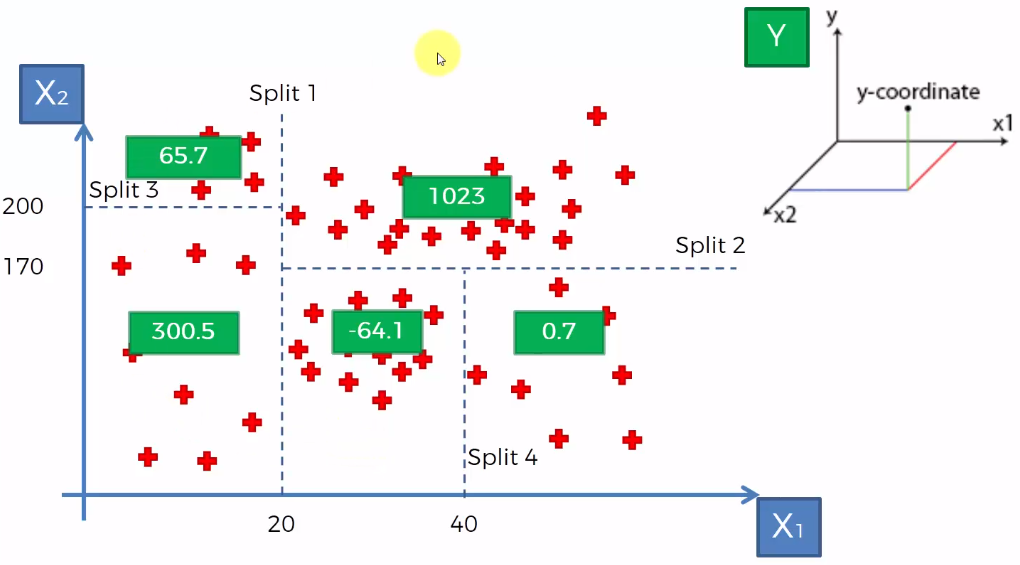

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv("Position_Salaries.csv")
#1D
X=dataset.iloc[:,1].values
#ubah 1D ke 2D
X=X.reshape(len(X),1)
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Training the Decision Tree Regression model on the whole dataset

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)

DecisionTreeRegressor()

## Predicting a new result

In [9]:
tree_reg.predict([[9.4]])

array([500000.])

## Visualising the Decision Tree Regression results (higher resolution)

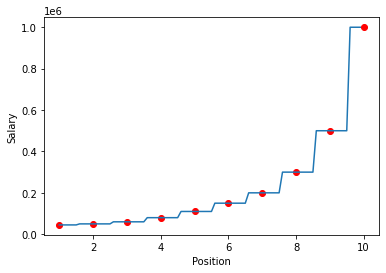

In [11]:
X_smoother = np.array([[i for i in np.arange(min(X),max(X),0.1)]])
X_smoother = X_smoother.reshape(len(X_smoother[0]),1)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.scatter(X,y,color="red")
y_smoother_pred = tree_reg.predict(X_smoother)
plt.plot(X_smoother,y_smoother_pred)
plt.show()